# p.14 Save Classifier with Pickle

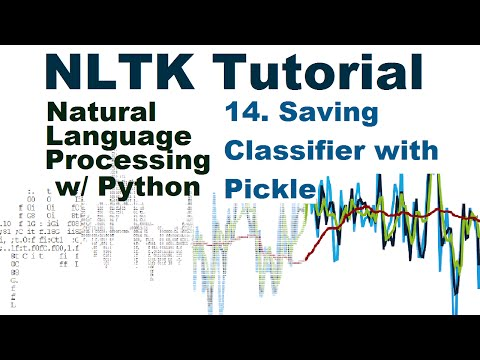

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ReakZVh2Xwk')

## 1. Pickle

(1) Processing bottleneck

* Loading a massive dataset into memory.
* Some basic pre-processing of a static data set.
* Training the classifier.

(2) Can load the trained classifier in a matter of milliseconds, rather than waiting for 3-5+ minutes for the classifier to be trained.

(3) Pickle

A module in the standard library that serializes and deserializes python objects.

## 2. Example

In [9]:
import nltk
import random
from nltk.corpus import movie_reviews
import pickle

# Oneliner which is equivalent to 
# documents = []
# for category in movie_reviews.categories():
#     for fileid in movie_reviews.fileids(category):
#         documents.append(list(movie_reviews(fileid)), category)

# Load 2000 movie reviews where 1000 are positive and the other 1000 are negative.
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Add all the words to a single list.
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words)

# Restrict our 'features' to the most common 3000 words.
word_features = list(all_words.keys())[:3000]

# Check if each of the most common 3000 words is present in one movie review.
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

# print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

# Label the 'features' in all the movie reviews.
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Partition the entire data set into training set and test set.
training_set = featuresets[:1900]
testing_set = featuresets[1900:]

# Bayes formula: posterior = prior x likelihood / evidence
#classifier = nltk.NaiveBayesClassifier.train(training_set)

classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

#save_classifier = open("naivebayes.pickle", "wb")
#pickle.dump(classifier, save_classifier)
#save_classifier.close()

Naive Bayes Algo accuracy percent: 85.0
Most Informative Features
                   sucks = True              neg : pos    =     10.6 : 1.0
               stretched = True              neg : pos    =     10.3 : 1.0
                  annual = True              pos : neg    =      9.7 : 1.0
                 frances = True              pos : neg    =      8.4 : 1.0
           unimaginative = True              neg : pos    =      8.3 : 1.0
             silverstone = True              neg : pos    =      7.6 : 1.0
              schumacher = True              neg : pos    =      7.4 : 1.0
                  regard = True              pos : neg    =      7.0 : 1.0
                    mena = True              neg : pos    =      7.0 : 1.0
                  suvari = True              neg : pos    =      7.0 : 1.0
                 idiotic = True              neg : pos    =      7.0 : 1.0
                  sexist = True              neg : pos    =      7.0 : 1.0
               atrocious = True   